https://pyzx.readthedocs.io/en/latest/gettingstarted.html

https://docs.quantum.ibm.com/api/qiskit/qasm2

In [ ]:
### Install Qiskit and relevant packages, if needed
### IMPORTANT: Make sure you are using python 3.10 or 3.11 for compatibility of the required packages
%pip install qiskit[visualization]==1.0.2
%pip install qiskit-ibm-runtime
%pip install qiskit-aer
%pip install graphviz
%pip install qiskit-transpiler-service


  Using cached qiskit-1.0.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.6 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.1.1
    Uninstalling qiskit-1.1.1:
      Successfully uninstalled qiskit-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-ibm-runtime 0.24.1 requires qiskit>=1.1.0, but you have qiskit 1.0.2 which is incompatible.
  Using cached qiskit-1.1.1-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.0.2
    Uninstalling qiskit-1.0.2:
      Successfully uninstalled qiskit-1.0.2


In [ ]:
### Save API Token, if needed

%set_env QXToken=d87cf3581eb6ebe7359f68f4c291a5de3492681bc5771ea0883755cbe075940a7ccabd89b28d03ac0bb14484cde73bac587cb0fdcabc4360ffd051fffc665c6c

# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=d87cf3581eb6ebe7359f68f4c291a5de3492681bc5771ea0883755cbe075940a7ccabd89b28d03ac0bb14484cde73bac587cb0fdcabc4360ffd051fffc665c6c


In [ ]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_transpiler_service.transpiler_service import TranspilerService

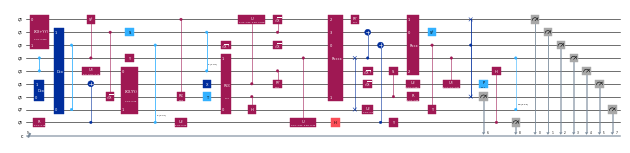

In [ ]:
from qiskit.circuit.random import random_circuit
'''
Parameters

num_qubits (int) – number of quantum wires
depth (int) – layers of operations (i.e. critical path length)
max_operands (int) – maximum qubit operands of each gate (between 1 and 4)
measure (bool) – if True, measure all qubits at the end
conditional (bool) – if True, insert middle measurements and conditionals
reset (bool) – if True, insert middle resets
seed (int) – sets random seed (optional)
'''
#https://docs.quantum.ibm.com/api/qiskit/0.40/qiskit.circuit.random.random_circuit

#circ = random_circuit(10, 10, measure=True)
#circ.draw(output='mpl')
circ = random_circuit(
  num_qubits = 9,
  depth = 9,
  max_operands = 4,
  measure = True,
  conditional = False,
  reset = False,
  seed = 42
  )
circ.draw(fold=-1, output="mpl", style="iqp", scale=0.2)


In [ ]:
import qiskit.qasm2
program = """
OPENQASM 2.0;
include "qelib1.inc";

qreg q[10];
creg c[10];

// Apply the Hadamard gate and controlled phase rotations for each qubit

h q[0];
cu1(pi/2) q[1], q[0];
cu1(pi/4) q[2], q[0];
cu1(pi/8) q[3], q[0];
cu1(pi/16) q[4], q[0];
cu1(pi/32) q[5], q[0];
cu1(pi/64) q[6], q[0];
cu1(pi/128) q[7], q[0];
cu1(pi/256) q[8], q[0];
cu1(pi/512) q[9], q[0];

h q[1];
cu1(pi/2) q[2], q[1];
cu1(pi/4) q[3], q[1];
cu1(pi/8) q[4], q[1];
cu1(pi/16) q[5], q[1];
cu1(pi/32) q[6], q[1];
cu1(pi/64) q[7], q[1];
cu1(pi/128) q[8], q[1];
cu1(pi/256) q[9], q[1];

h q[2];
cu1(pi/2) q[3], q[2];
cu1(pi/4) q[4], q[2];
cu1(pi/8) q[5], q[2];
cu1(pi/16) q[6], q[2];
cu1(pi/32) q[7], q[2];
cu1(pi/64) q[8], q[2];
cu1(pi/128) q[9], q[2];

h q[3];
cu1(pi/2) q[4], q[3];
cu1(pi/4) q[5], q[3];
cu1(pi/8) q[6], q[3];
cu1(pi/16) q[7], q[3];
cu1(pi/32) q[8], q[3];
cu1(pi/64) q[9], q[3];

h q[4];
cu1(pi/2) q[5], q[4];
cu1(pi/4) q[6], q[4];
cu1(pi/8) q[7], q[4];
cu1(pi/16) q[8], q[4];
cu1(pi/32) q[9], q[4];

h q[5];
cu1(pi/2) q[6], q[5];
cu1(pi/4) q[7], q[5];
cu1(pi/8) q[8], q[5];
cu1(pi/16) q[9], q[5];

h q[6];
cu1(pi/2) q[7], q[6];
cu1(pi/4) q[8], q[6];
cu1(pi/8) q[9], q[6];

h q[7];
cu1(pi/2) q[8], q[7];
cu1(pi/4) q[9], q[7];

h q[8];
cu1(pi/2) q[9], q[8];

h q[9];

// Swap the qubits to complete the QFT
swap q[0], q[9];
swap q[1], q[8];
swap q[2], q[7];
swap q[3], q[6];
swap q[4], q[5];

// Measure the qubits
measure q -> c;
"""
test_circuit_qiskit = qiskit.qasm2.loads(program)
test_circuit_qiskit.draw()

QASM2ParseError: "<input>:76,0: 'swap' is not defined in this scope"

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(10, 'q')
creg_c = ClassicalRegister(10, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# Apply the Hadamard gate and controlled phase rotations for each qubit
circuit.h(qreg_q[0])
circuit.cp(pi / 2, qreg_q[1], qreg_q[0])
circuit.cp(pi / 4, qreg_q[2], qreg_q[0])
circuit.cp(pi / 8, qreg_q[3], qreg_q[0])
circuit.cp(pi / 16, qreg_q[4], qreg_q[0])
circuit.cp(pi / 32, qreg_q[5], qreg_q[0])
circuit.cp(pi / 64, qreg_q[6], qreg_q[0])
circuit.cp(pi / 128, qreg_q[7], qreg_q[0])
circuit.cp(pi / 256, qreg_q[8], qreg_q[0])
circuit.cp(pi / 512, qreg_q[9], qreg_q[0])
circuit.h(qreg_q[1])
circuit.cp(pi / 2, qreg_q[2], qreg_q[1])
circuit.cp(pi / 4, qreg_q[3], qreg_q[1])
circuit.cp(pi / 8, qreg_q[4], qreg_q[1])
circuit.cp(pi / 16, qreg_q[5], qreg_q[1])
circuit.cp(pi / 32, qreg_q[6], qreg_q[1])
circuit.cp(pi / 64, qreg_q[7], qreg_q[1])
circuit.cp(pi / 128, qreg_q[8], qreg_q[1])
circuit.cp(pi / 256, qreg_q[9], qreg_q[1])
circuit.h(qreg_q[2])
circuit.cp(pi / 2, qreg_q[3], qreg_q[2])
circuit.cp(pi / 4, qreg_q[4], qreg_q[2])
circuit.cp(pi / 8, qreg_q[5], qreg_q[2])
circuit.cp(pi / 16, qreg_q[6], qreg_q[2])
circuit.cp(pi / 32, qreg_q[7], qreg_q[2])
circuit.cp(pi / 64, qreg_q[8], qreg_q[2])
circuit.cp(pi / 128, qreg_q[9], qreg_q[2])
circuit.h(qreg_q[3])
circuit.cp(pi / 2, qreg_q[4], qreg_q[3])
circuit.cp(pi / 4, qreg_q[5], qreg_q[3])
circuit.cp(pi / 8, qreg_q[6], qreg_q[3])
circuit.cp(pi / 16, qreg_q[7], qreg_q[3])
circuit.cp(pi / 32, qreg_q[8], qreg_q[3])
circuit.cp(pi / 64, qreg_q[9], qreg_q[3])
circuit.h(qreg_q[4])
circuit.cp(pi / 2, qreg_q[5], qreg_q[4])
circuit.cp(pi / 4, qreg_q[6], qreg_q[4])
circuit.cp(pi / 8, qreg_q[7], qreg_q[4])
circuit.cp(pi / 16, qreg_q[8], qreg_q[4])
circuit.cp(pi / 32, qreg_q[9], qreg_q[4])
circuit.h(qreg_q[5])
circuit.cp(pi / 2, qreg_q[6], qreg_q[5])
circuit.cp(pi / 4, qreg_q[7], qreg_q[5])
circuit.cp(pi / 8, qreg_q[8], qreg_q[5])
circuit.cp(pi / 16, qreg_q[9], qreg_q[5])
circuit.h(qreg_q[6])
circuit.cp(pi / 2, qreg_q[7], qreg_q[6])
circuit.cp(pi / 4, qreg_q[8], qreg_q[6])
circuit.cp(pi / 8, qreg_q[9], qreg_q[6])
circuit.h(qreg_q[7])
circuit.cp(pi / 2, qreg_q[8], qreg_q[7])
circuit.cp(pi / 4, qreg_q[9], qreg_q[7])
circuit.h(qreg_q[8])
circuit.cp(pi / 2, qreg_q[9], qreg_q[8])
circuit.h(qreg_q[9])
# Swap the qubits to complete the QFT
circuit.swap(qreg_q[0], qreg_q[9])
circuit.swap(qreg_q[1], qreg_q[8])
circuit.swap(qreg_q[2], qreg_q[7])
circuit.swap(qreg_q[3], qreg_q[6])
circuit.swap(qreg_q[4], qreg_q[5])
# Measure the qubits
circuit.measure(qreg_q, creg_c)

In [ ]:
import qiskit.qasm2
from qiskit.circuit import QuantumCircuit

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
print(qiskit.qasm2.dumps(qc))

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];


In [ ]:
circuit = zx.generate.CNOT_HAD_PHASE_circuit(qubits=4,depth=20,clifford=True)


NameError: name 'zx' is not defined

In [ ]:
qiskit.qasm2.dump(qc, "/content/shors_algorithm.qasm")

In [ ]:
qiskit.qasm2.dump(circ, "myfile_test.qasm")

NameError: name 'circ' is not defined

In [ ]:
!pip install pyzx


In [ ]:
import pyzx as zx


In [ ]:
test_circuit_zx = zx.Circuit.load('/content/shors_algorithm.qasm')


In [ ]:
print(test_circuit_zx)

Circuit(10 qubits, 0 bits, 60 gates)


In [ ]:
#circuit = zx.generate.CNOT_HAD_PHASE_circuit(qubits=4,depth=20,clifford=True)


In [ ]:
zx.draw(test_circuit_zx)


In [ ]:
g = test_circuit_zx.to_graph()
zx.clifford_simp(g)  # simplifies the diagram
g.normalize()  # makes it more presentable
zx.draw(g)

In [ ]:
c = zx.extract_circuit(g.copy())
zx.draw(c)

In [ ]:
c2 = zx.optimize.basic_optimization(c.to_basic_gates())
zx.draw(c2)

In [ ]:
print(c2)

Circuit(10 qubits, 0 bits, 237 gates)


In [ ]:
print(c2.to_qasm())


OPENQASM 2.0;
include "qelib1.inc";
qreg q[10];
cx q[2], q[0];
rz(0.875*pi) q[2];
rz(0.9375*pi) q[3];
rz(0.96875*pi) q[4];
rz(0.984375*pi) q[5];
rz(0.9921875*pi) q[6];
rz(0.99609375*pi) q[7];
rz(0.998046875*pi) q[8];
h q[0];
rz(1.9990234375*pi) q[0];
cx q[0], q[1];
rz(0.25*pi) q[1];
cx q[1], q[2];
rz(-0.5*pi) q[2];
cx q[0], q[9];
rz(0.9990234375*pi) q[9];
cx q[0], q[1];
rz(0.25*pi) q[1];
cx q[1], q[2];
rz(1.875*pi) q[2];
cz q[2], q[3];
h q[1];
rz(1.75*pi) q[1];
cx q[0], q[1];
cx q[2], q[1];
h q[2];
rz(0.25*pi) q[2];
cx q[0], q[2];
rz(-0.5*pi) q[2];
rz(0.25*pi) q[1];
cx q[3], q[1];
cx q[0], q[3];
cx q[3], q[2];
rz(1.4375*pi) q[3];
cz q[3], q[4];
rz(1.875*pi) q[1];
cx q[0], q[1];
rz(0.25*pi) q[2];
cx q[3], q[1];
h q[3];
rz(0.25*pi) q[3];
cx q[0], q[3];
rz(-0.5*pi) q[3];
cx q[4], q[2];
rz(0.125*pi) q[1];
rz(1.875*pi) q[2];
cx q[0], q[2];
cx q[4], q[1];
cx q[0], q[4];
cx q[4], q[2];
cx q[4], q[3];
rz(1.46875*pi) q[4];
cz q[4], q[5];
rz(1.9375*pi) q[1];
cx q[0], q[1];
rz(0.125*pi) q[2];
rz(

In [ ]:
#zx.compare_tensors(c2,g,preserve_scalar=False)

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="d87cf3581eb6ebe7359f68f4c291a5de3492681bc5771ea0883755cbe075940a7ccabd89b28d03ac0bb14484cde73bac587cb0fdcabc4360ffd051fffc665c6c",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    # overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()
transpiler_ai_true = TranspilerService(
    # Add your code here
    backend_name="ibm_brisbane",
    ai="true",
    optimization_level=3,
    )

In [ ]:
circuit_ai_true = transpiler_ai_true.run(test_circuit_qiskit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


In [ ]:
qiskit.qasm2.dump(circuit_ai_true, "myfile.qasm")


Transpiled with AI -> Depth: 81, CNOTs: 25


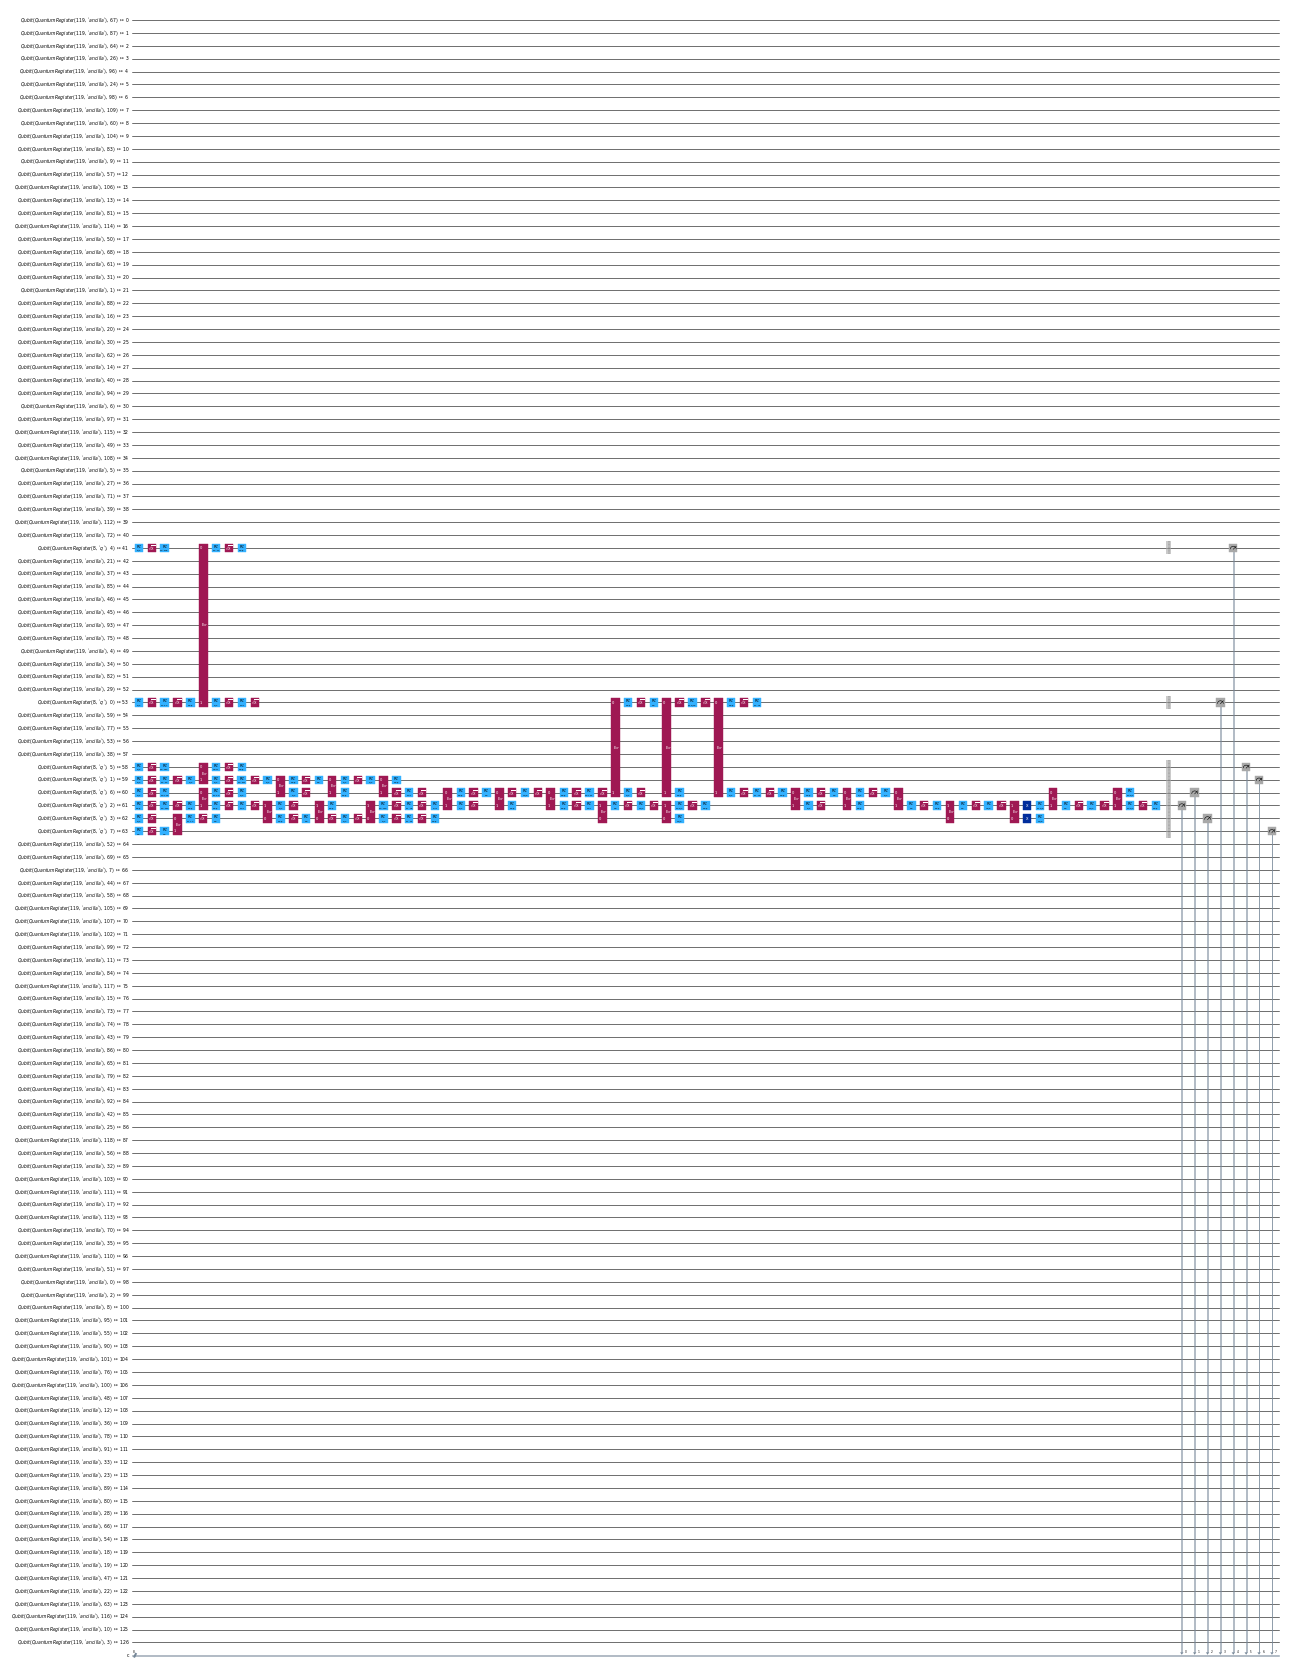

In [ ]:
print(f"Transpiled with AI -> Depth: {circuit_ai_true.depth()}, CNOTs: {circuit_ai_true.num_nonlocal_gates()}")
circuit_ai_true.draw(fold=-1, output="mpl", scale=0.2)

In [ ]:
# Run and compile results
num_qubits = [10, 20]
num_cnots_local = []
num_cnots_with_ai = []
num_cnots_without_ai = []

for nq in num_qubits:
    circuit = EfficientSU2(nq, entanglement="circular", reps=1).decompose()

    # Using the Transpiler locally on Qiskit
    circuit_local = pm.run(circuit)
    # Using the transpiler service without AI
    circuit_without_ai = transpiler_ai_false.run(circuit)
    # Using the transpiler service with AI
    circuit_with_ai = transpiler_ai_true.run(circuit)

    num_cnots_local.append(circuit_local.num_nonlocal_gates())
    num_cnots_without_ai.append(circuit_without_ai.num_nonlocal_gates())
    num_cnots_with_ai.append(circuit_with_ai.num_nonlocal_gates())

In [ ]:
plt.plot(num_qubits, num_cnots_with_ai, '.-')
plt.plot(num_qubits, num_cnots_without_ai, '.-')
plt.plot(num_qubits, num_cnots_local, '--')
plt.xlabel("Number of qubits")
plt.ylabel("CNOT count")
plt.legend(["Qiskit Transpiler Service with AI", "Qiskit Transpiler Service without AI", "Qiskit SDK"])

In [ ]:
qasm_qft = """
OPENQASM 2.0;
include "qelib1.inc";

qreg q[10];
creg c[10];

// Apply the Hadamard gate and controlled phase rotations for each qubit

h q[0];
cu1(pi/2) q[1], q[0];
cu1(pi/4) q[2], q[0];
cu1(pi/8) q[3], q[0];
cu1(pi/16) q[4], q[0];
cu1(pi/32) q[5], q[0];
cu1(pi/64) q[6], q[0];
cu1(pi/128) q[7], q[0];
cu1(pi/256) q[8], q[0];
cu1(pi/512) q[9], q[0];

h q[1];
cu1(pi/2) q[2], q[1];
cu1(pi/4) q[3], q[1];
cu1(pi/8) q[4], q[1];
cu1(pi/16) q[5], q[1];
cu1(pi/32) q[6], q[1];
cu1(pi/64) q[7], q[1];
cu1(pi/128) q[8], q[1];
cu1(pi/256) q[9], q[1];

h q[2];
cu1(pi/2) q[3], q[2];
cu1(pi/4) q[4], q[2];
cu1(pi/8) q[5], q[2];
cu1(pi/16) q[6], q[2];
cu1(pi/32) q[7], q[2];
cu1(pi/64) q[8], q[2];
cu1(pi/128) q[9], q[2];

h q[3];
cu1(pi/2) q[4], q[3];
cu1(pi/4) q[5], q[3];
cu1(pi/8) q[6], q[3];
cu1(pi/16) q[7], q[3];
cu1(pi/32) q[8], q[3];
cu1(pi/64) q[9], q[3];

h q[4];
cu1(pi/2) q[5], q[4];
cu1(pi/4) q[6], q[4];
cu1(pi/8) q[7], q[4];
cu1(pi/16) q[8], q[4];
cu1(pi/32) q[9], q[4];

h q[5];
cu1(pi/2) q[6], q[5];
cu1(pi/4) q[7], q[5];
cu1(pi/8) q[8], q[5];
cu1(pi/16) q[9], q[5];

h q[6];
cu1(pi/2) q[7], q[6];
cu1(pi/4) q[8], q[6];
cu1(pi/8) q[9], q[6];

h q[7];
cu1(pi/2) q[8], q[7];
cu1(pi/4) q[9], q[7];

h q[8];
cu1(pi/2) q[9], q[8];

h q[9];

// Swap the qubits to complete the QFT
swap q[0], q[9];
swap q[1], q[8];
swap q[2], q[7];
swap q[3], q[6];
swap q[4], q[5];

// Measure the qubits
measure q -> c;
"""